In [1]:
import numpy as np

from fractions import Fraction
from decimal import Decimal

from src.FixedPrecision import FixedPrecision
from src.FloatNumber import FloatNumber
from src.RationalNumber import RationalNumber



from PIapprox.piApproxxPolygon import PolygonApproximation
from PIapprox.continued_fraction_pi import continued_fraction_pi
from PIapprox.ramanujan_pi import ramanujan_pi
from PIapprox.leibniz_pi import leibniz_pi
from PIapprox.chudnovsky_pi import chudnovsky_pi
from PIapprox.BBP_pi import bbp_pi
from PIapprox.piApproxMonte import MonteCarloApproximation
from PIapprox.piDigitFormulas import PiCalculator

import matplotlib.pyplot as plt

import time

import plots as plts

# Comparing various implementations of estimating $\pi$ #



The collection of implemented approximations is selected from the [Wikipedia](https://en.wikipedia.org/wiki/Approximations_of_π) page.
Our methods for evaluating $\pi$ benefit from using `polygons`, `Monte Carlo algorithm`, `continued-fraction approach`, `Ramanujan's formula`, `Leibniz formula`, `Chudnovsky formula`, `Bailey–Borwein–Plouffe formula (BBP) fromula`, `Gauss-Legendre algorithm` and `Nilakantha series`. Concise descriptions of these approaches are provided in the following cells generated by AI.

For each of these approaches, we present the following points.

- comparing values of each approximation of $\pi$ with `np.pi`.
- estimating errors between the our approximation $\pi_{approx}$ and the numpy value $\pi_{numpy}$
- comparing computation time for various types of outputs including `float`, `Decimal`, `Fraction`, `FloatNumber`, `RationalNumber`, `Fixedprecision`



### Approximating $\pi$ by Polygons:

Approximating $\pi$ using polygons involves inscribing and circumscribing regular polygons with increasing numbers of sides around a circle. As the number of sides increases, the perimeters of the inscribed and circumscribed polygons converge to the circle's circumference, allowing $\pi$ to be approximated [Wikipedia](https://en.wikipedia.org/wiki/Approximations_of_π).

- We compare the dependency on pi approximation as a function of sides of polygons. 
- We compute the differece between the value of `np.pi` and approximative values at each side
- We present the run-time to evaluate each approximation for a fixed side value

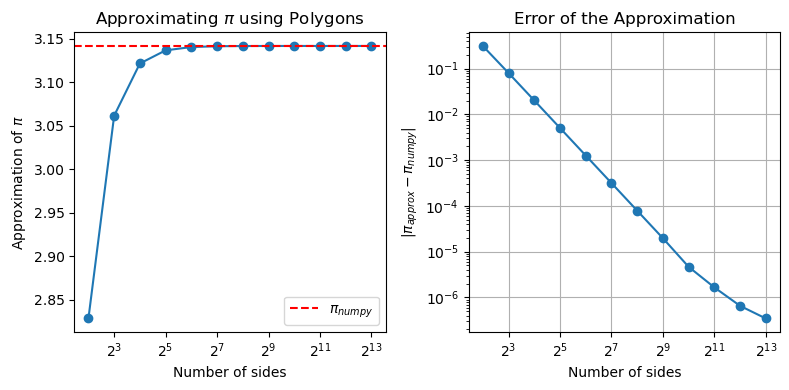

In [2]:
sides = FixedPrecision(4, 0)  # Start with 4 sides
precision = FixedPrecision(4e-7, 7)  # Desired precision [up to 4e-7 and 7 decimal places]
approximator = PolygonApproximation(sides)
approximator.calculate_approximations(precision)
plts.plot_approxs_polygon(approximator)

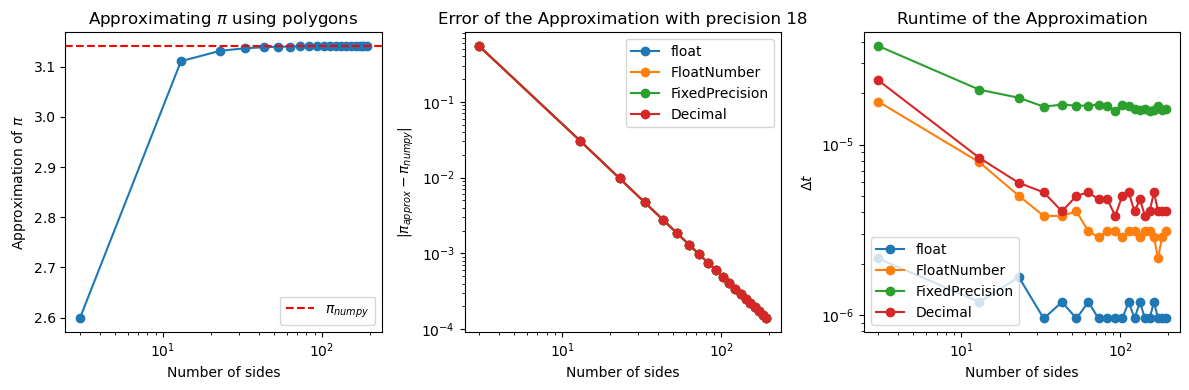

In [3]:
plts.plot_poly_sides(18)

Our left panels gradually converge towards `np.pi` as the number of sides enhances. Plotting errors in the middle panels reveal that the error reduces exponentially with the number of sides. Comparing the computational time for different types of outputs on the right panel shows that the Python-implemented output classes, namely `float` and `Decimal`, perform faster for this particular approximation. Our implementation of `FixedPrecision`~(green lines) is more than an over of magnitude slower than the `float`~(blue) cases.

### Approximating $\pi$ by Continued fraction:

The continued fraction representation of $\pi$ allows it to be approximated by truncating the fraction at successive convergents. This provides rational approximations that converge to $\pi$ in the limit.

- We compare the dependency on pi approximation up to a certain digit `numdigit <=14`. 
- We compute the difference between the value of `np.pi` and approximative values at each `numdigit`
- We present the run-time for computing approximations of $\pi$ at a fixed `numdigit` using the `Fraction` and `float` in the python package and our `RatinalNumber` and `FloatNumber`

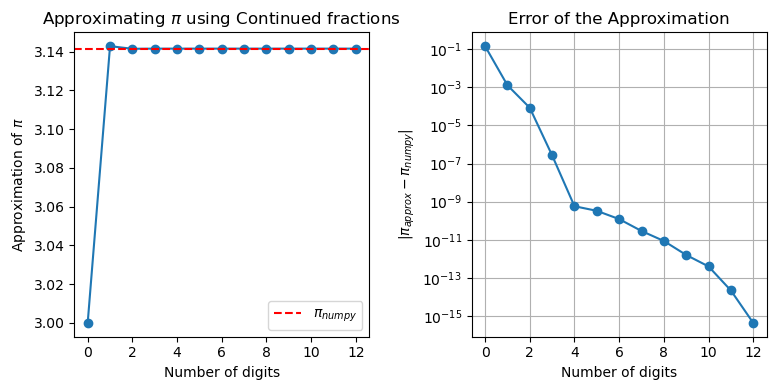

In [4]:
plts.plot_approxs_confrac(13)

Clearly, this algorithm allows us to obtain an accurate estimation of $pi$ with the error being less than $10^{-15}$. The figure further exhibits a kink in the error plot at $\# {\rm edges} =4$. While we observe an abrupt reduction of the error values for $\# {\rm edges} <= 4$, the mitigation of error values reduces after the kink. 

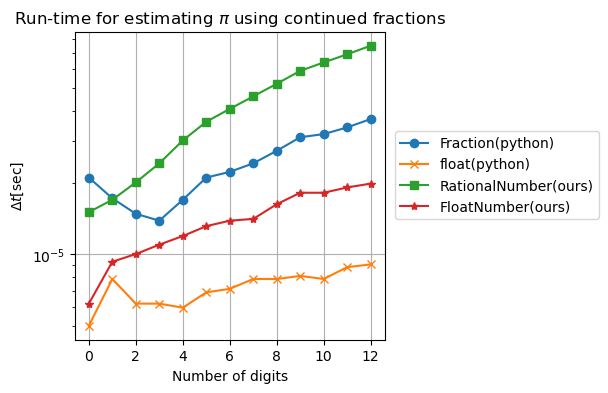

In [5]:
plts.plot_time_approxs_confrac(maxnumdigit=13)

Here, we present the runtime values for estimating pi using different types of output values. The Fraction~(blue lines) and float~(orange) types are Python-implemented libraries, and RationalNumber~(green) and FloatNumber~(red) are our type classes. Evidently, the float types are fastest with $\Delta t < 10^{-5}$. Overall, the speed of our "FloatNumber" implimentation is comparable with its counterpart in python package (Note that in some cases it is even faster). Comparing our implementation of RationalNumber with Fraction shows that our implementation is faster for the specific problem of evaluating $\pi_{approx}$.

### Approximating $\pi$ by Ramanujan's formula:

Srinivasa Ramanujan discovered several infinite series that converge rapidly to 1/$\pi$, allowing efficient computation of $\pi$'s digits. His work formed the basis for the Chudnovsky algorithm.

- We compute the difference between the value of `np.pi` and the approximative value
- We present the run-time for computing approximations of $\pi$ using the `Decimal` and `float` in the python package and our `FixedPrecision` and `FloatNumber`

In [6]:
for types in ["FloatNumber", "float", "FixedPrecision", "Decimal", ]:
    precision = 10
    start_time = time.time()
    pi_approx = ramanujan_pi(typeoutput=types, outputprec=precision, output=False)
    time_est_pi = time.time() - start_time
    
    print("Ramanujan approx. of pi=", pi_approx, " using ", types, "run-time=", time_est_pi, "[sec]")
    if types=="Decimal":
        print("Error |pi_approx-pi|=", np.abs(pi_approx - Decimal(np.pi))) 
    else:
        print("Error |pi_approx-pi|=", np.abs(pi_approx -np.pi)) 

Ramanujan approx. of pi= 3.141592653589793  using  FloatNumber run-time= 0.00012612342834472656 [sec]
Error |pi_approx-pi|= 0.0
Ramanujan approx. of pi= 3.141592653589793  using  float run-time= 6.794929504394531e-05 [sec]
Error |pi_approx-pi|= 0.0
Ramanujan approx. of pi= 3.1415926536  using  FixedPrecision run-time= 6.604194641113281e-05 [sec]
Error |pi_approx-pi|= 0.0000000000
Ramanujan approx. of pi= 3.1415926536  using  Decimal run-time= 7.224082946777344e-05 [sec]
Error |pi_approx-pi|= 1.020688400203653145581483841E-11


Ramanujan's formula also gives an accurate estimation of $\pi$ with the error being below the requested precision. By comparing the run-time for various types of outputs, we notice that the Python implementation of `float` is an order of magnitude faster than our `Floatnumber.` However, our `FixedPercision` performs better than `Decimal` with a smaller run-time.

### Approximating $\pi$ by Leibniz formula:
The Leibniz formula is an infinite series that converges slowly to $\pi$/4, making it inefficient for high-precision computation of $\pi$.

- We compare the dependency on pi approximation up to a certain number of terms `num_terms`. 
- We compute the difference between the value of `np.pi` and approximative values at each `num_terms`
- We present the run-time for computing approximations of $\pi$ at a fixed `num_terms` using the `Decimal` and `float` in the python package and our `FixedPercision` and `FloatNumber`

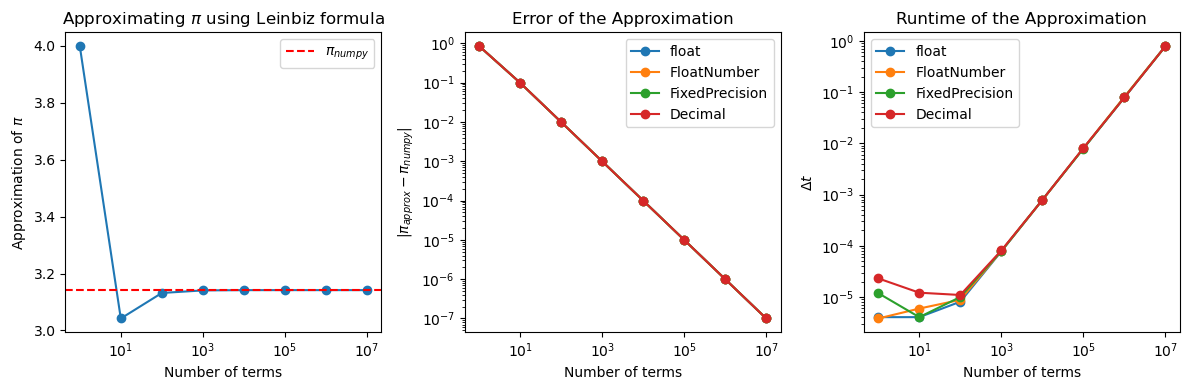

In [7]:
plts.plot_leibniz(16)

The approximation of $\pi$ using the Leibniz formula converges nicely to the `np. pi` value. The error decreases exponentially with the number of terms in the formula. The outputs using different types are very close. 
In addition, the runtime $\Delta t$ is almost comparable especially for $\# {\rm terms}>10^{4}$ and it grows exponentially with $\# {\rm terms}$.

### Approximating $\pi$ by Chudnovsky formula:
The Chudnovsky brothers discovered a rapidly converging series based on Ramanujan's work, allowing computation of $\pi$ to billions of digits. It has been used for several record $\pi$ calculations and has complexity O(n(log n)^3).

- We compute the difference between the value of `np.pi` and the approximative value
- We present the run-time for computing approximations of $\pi$ using the `Decimal` and `float` in the python package and our `FixedPrecision` and `FloatNumber`

In [8]:
for types in ["FloatNumber", "float", "FixedPrecision", "Decimal", ]:
    precision = 10
    start_time = time.time()
    pi_approx = chudnovsky_pi(typeoutput=types, outputprec=precision, output=False)
    time_est_pi = time.time() - start_time
    
    print("Chudnovsky approx. of pi=", pi_approx, " using ", types, "run-time=", time_est_pi, "[sec]")
    if types=="Decimal":
        print("Error |pi_approx-pi|=", np.abs(pi_approx - Decimal(np.pi))) 
    else:
        print("Error |pi_approx-pi|=", np.abs(pi_approx -np.pi)) 

Chudnovsky approx. of pi= 3.1415926535897936  using  FloatNumber run-time= 0.00011086463928222656 [sec]
Error |pi_approx-pi|= 4.440892098500626e-16
Chudnovsky approx. of pi= 3.1415926535897936  using  float run-time= 7.009506225585938e-05 [sec]
Error |pi_approx-pi|= 4.440892098500626e-16
Chudnovsky approx. of pi= 3.1415926536  using  FixedPrecision run-time= 6.771087646484375e-05 [sec]
Error |pi_approx-pi|= 0.0000000000
Chudnovsky approx. of pi= 3.1415926536  using  Decimal run-time= 7.200241088867188e-05 [sec]
Error |pi_approx-pi|= 1.020688400203653145581483841E-11


Chudnovsky's formula also gives an accurate estimation of $\pi$ with the error being below the requested precision. By comparing the run-time for various types of outputs, we notice that the Python implementation of `float` is an order of magnitude faster than our `Floatnumber.` However, our `FixedPercision` performs similarly to the `Decimal in terms of the computational time.

### Approximating $\pi$ by BBP formula:
The BBP formula, discovered in 1995, allows direct computation of any individual hexadecimal digit of $\pi$ without calculating preceding digits, using a spigot algorithm approach. This enables efficient validation of high-precision $\pi$ calculations.

- We compute the difference between the value of `np.pi` and the approximative value
- We present the run-time for computing approximations of $\pi$ using the `Decimal` and `float` in the python package and our `FixedPrecision` and `FloatNumber`

In [9]:
for types in ["FloatNumber", "float", "FixedPrecision", "Decimal"]:
    precision = 15
    start_time = time.time()
    pi_approx = bbp_pi(typeoutput=types, outputprec=precision, output=False)
    time_est_pi = time.time() - start_time
    
    print("BBP approx. of pi=", pi_approx, " using ", types, "run-time=", time_est_pi, "[sec]")
    if types=="Decimal":
        print("Error |pi_approx-pi|=", np.abs(pi_approx - Decimal(np.pi))) 
    else:
        print("Error |pi_approx-pi|=", np.abs(pi_approx -np.pi)) 

BBP approx. of pi= 3.141592653589793  using  FloatNumber run-time= 8.392333984375e-05 [sec]
Error |pi_approx-pi|= 0.0
BBP approx. of pi= 3.141592653589793  using  float run-time= 1.0013580322265625e-05 [sec]
Error |pi_approx-pi|= 0.0
BBP approx. of pi= 3.141592653589793  using  FixedPrecision run-time= 0.00028586387634277344 [sec]
Error |pi_approx-pi|= 0.000000000000000
BBP approx. of pi= 3.141592653589793  using  Decimal run-time= 0.00013828277587890625 [sec]
Error |pi_approx-pi|= 1.159979634685441851615905762E-16


BBP's formula also accurately estimates $\pi$ with the error being below the requested precision. By comparing the run-time for various types of outputs, we notice that the Python implementations of `float` and `Decimal` perform similarly to our implementations of `Floatnumber.` and `FixedPercision` regarding the run-time.

### Approximating $\pi$ by Monte-Carlo approach:
Monte Carlo methods use randomized simulations to estimate $\pi$. Our method randomly places dots in a square, and the ratio of dots inside the inscribed circle approximates $\pi$/4.

- We compare the dependency on pi approximation up to a certain number of random points `num_points`. 
- We compute the difference between the value of `np.pi` and approximative values at each `num_points`
- We present the run-time for computing approximations of $\pi$ at a fixed `num_points` using the `Decimal` and `float` in the python package and our `FixedPercision` and `FloatNumber`

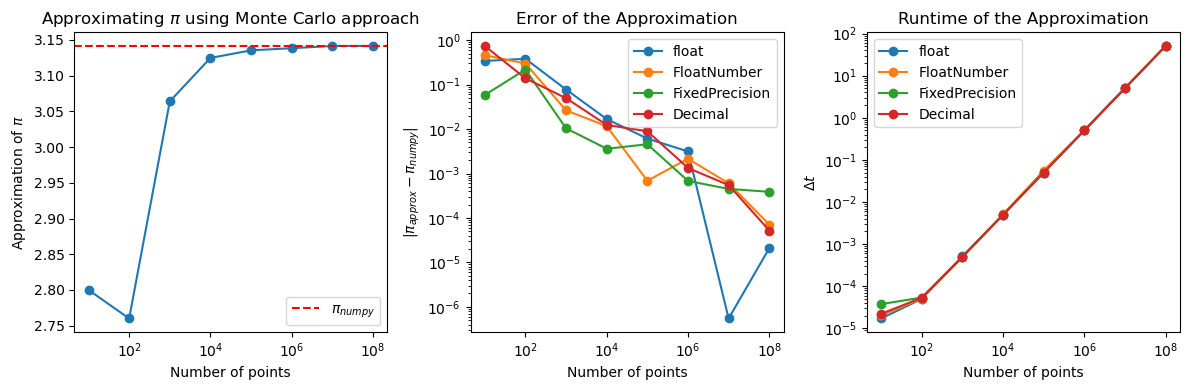

In [10]:
plts.plot_mc(outputprec=10)

The $\pi$ estimation using the Monte Carlo approach converges to `np.pi`~(red dashed lines in the left panel) at a large number of points. This was not unexpected due to the random nature of the approach. The estimation error~(middle panel) reduces exponentially as the number of points increases, which is in agreement with our expectation. The calculated errors are almost independent of the depicted type of output value. Hence, we conclude that the performance of `float`, `Decimal`, `FloatNumber` and `FixedPrecision` are comparable. We further note that the presented computation is computationally expensive as the runtime grows exponentially with the number of points; see right panel. 

### Approximating $\pi$ by Gauss-Legendre algorithm:
The Gauss-Legendre algorithm uses the arithmetic-geometric mean to compute $\pi$ iteratively with complexity O(M(n)log(n)), where M(n) is the complexity of multiplication.

- We compare the dependency on pi approximation up to a certain digit `numdigit`. 
- We compute the difference between the value of `np.pi` and approximative values at each `numdigit`
- We present the run-time for computing approximations of $\pi$ at a fixed `numdigit` using the `Fraction` and `float` in the python package and our `RatinalNumber` and `FloatNumber`

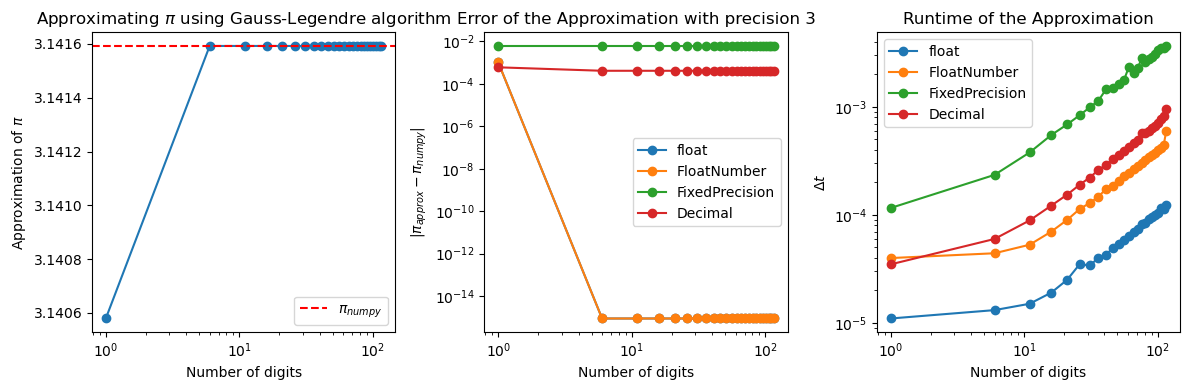

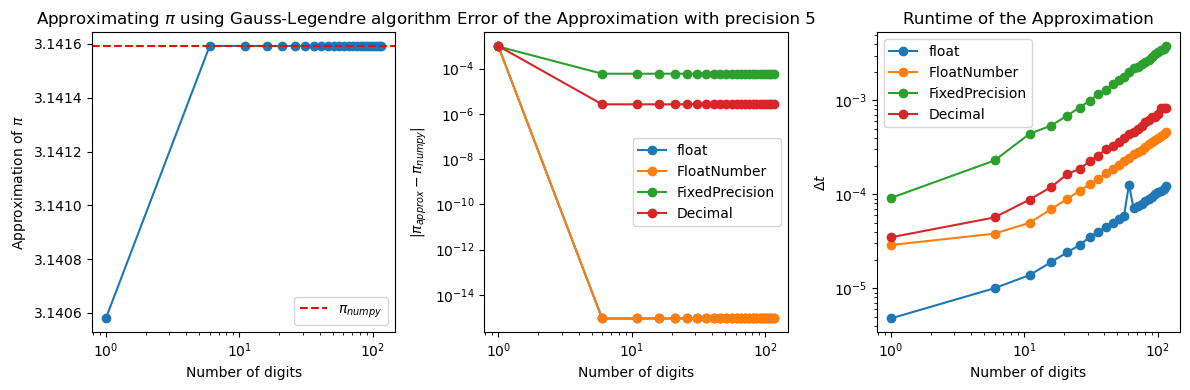

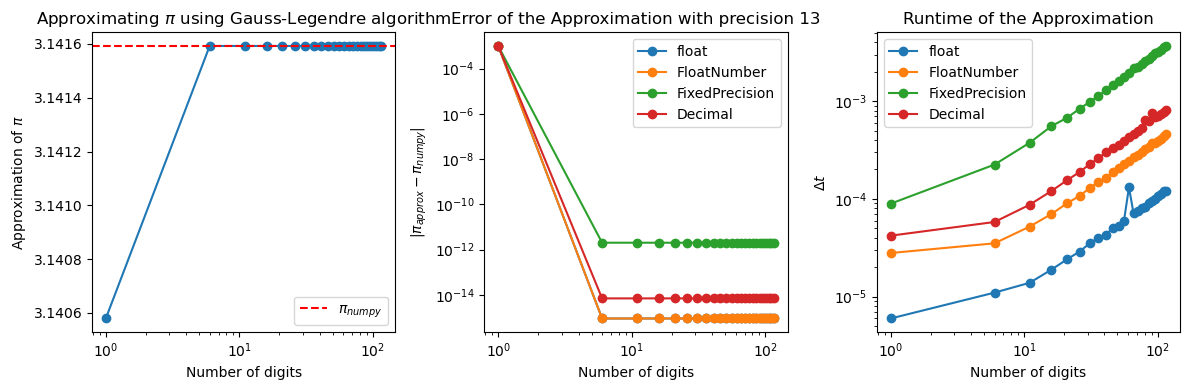

In [11]:
for prec in [3, 5, 13]:
    plts.plot_gl(prec)

The $\pi$ estimation in the Gauss-Legendre algorithm quickly approaches the value of `np.pi` as shown in the above-left panels.  The accuracy of the estimation is enhanced as the number of digits increases.  For `Decimal` and `FixedPrecision`, where we set the output precision externally, the error $|\pi_{ approx} - \pi_{numpy}|$ exhibit dependency to the precision value~(`prec`).  We do not detect any dependency on the precision in the `float` and `FloatNumber` types as, by construction, no precision is fixed on these data types.  The computational expense in terms of the run-time increases upon enhancing the number of digits.  From an implementation perspective,  the `float` types correspond to the fastest computations, while calculations with `FixedPrecision` outputs take the most extended run-time. 

### Approximating $\pi$ by Nilakantha series:
The Nilakantha series is an infinite series discovered in the 15th century that converges to $\pi/4$, but very slowly, making it impractical for high-precision computation.

- We compare the dependency on pi approximation up to a certain digit `numdigit`. 
- We compute the difference between the value of `np.pi` and approximative values at each `numdigit`
- We present the run-time for computing approximations of $\pi$ at a fixed `numdigit` using the `Fraction` and `float` in the python package and our `RatinalNumber` and `FloatNumber`

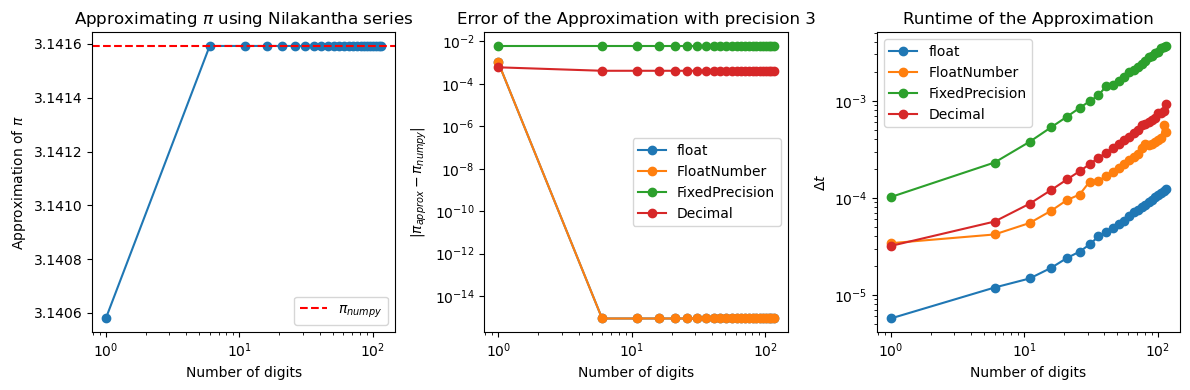

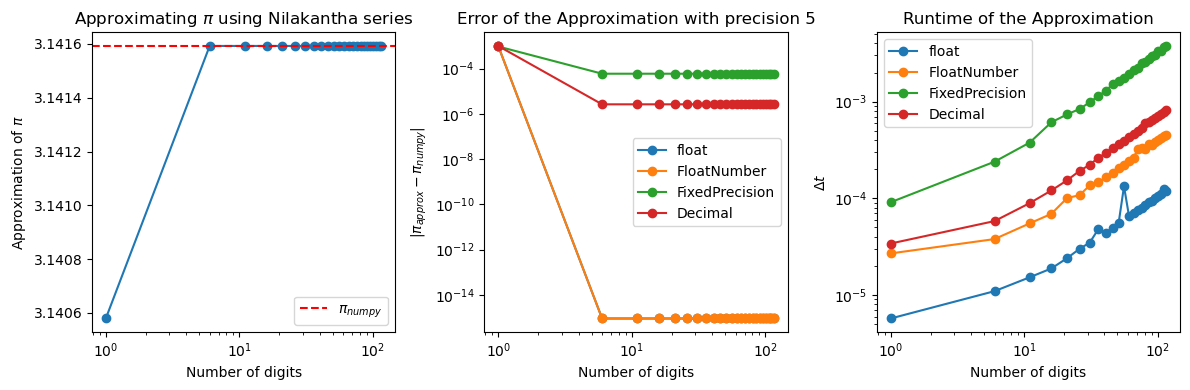

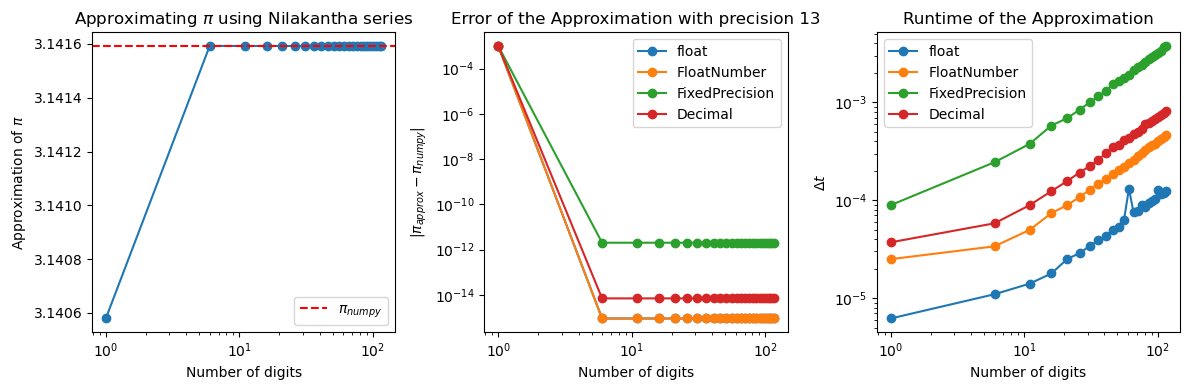

In [12]:
for prec in [3, 5, 13]:
    plts.plot_nik(prec)

The conclusions for evaluating $\pi$ using the Nilakantha series is just the same as what we have presented for the Gauss-Legendre algorithm. hence, we refrain from repeating those points.

## Concluding remarks

To summarize, our results show that accurate estimation of $\pi$ requires at least $10^-5$[sec]. This computational time increases as we employ iterative or random-based~(Monte Carlo) methods. In most cases, employing `float` or `FloatNumber` as output types expedites the numerical process, while `RationalNumber` or `FixedPrecision` requires more time to calculate the approximation of $\pi$. 